# Benchmarking for Polyhedral Prism Current Source

Document contains various benchmarking for the polyhedral current source. The version being tested is the one incorporating the trapezoidal current source to calculate the magnetic fields.

## Benchmark against cuboid

### Shape Benchmark

First step is to benchmark the shape of the polyhedral prism against the trapezoidal prism to make sure they align for the simple cuboid case as well as having matching cross sectional areas.

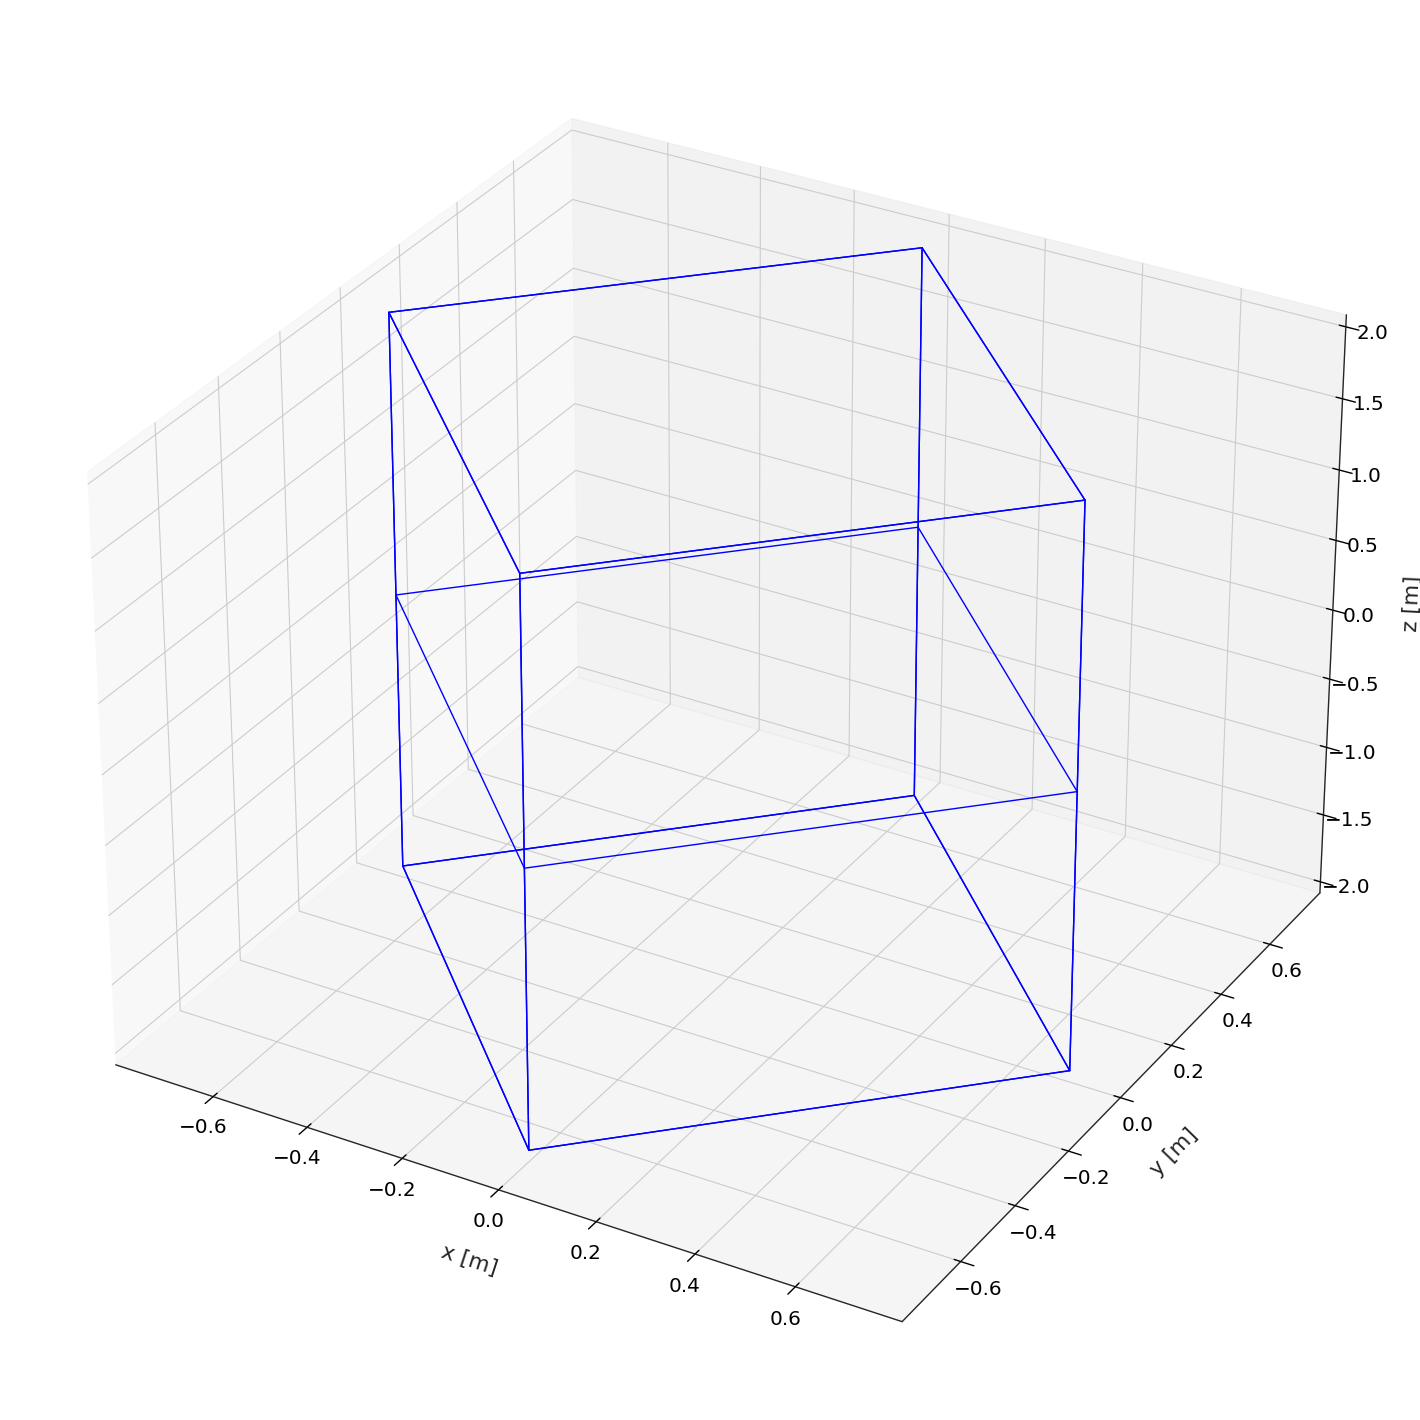

trapezoidal area = 1.0
polyhedral area = 1.0000000000380496


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from bluemira.magnetostatics.biot_savart import BiotSavartFilament
from bluemira.magnetostatics.trapezoidal_prism import TrapezoidalPrismCurrentSource
from bluemira.magnetostatics.polyhedral_prism_wire import PolyhedralPrismCurrentSource
from bluemira.utilities.plot_tools import Plot3D

source = TrapezoidalPrismCurrentSource(
    np.array([0, 0, 0]),
    np.array([0, 0, 4]),
    np.array([0, 1, 0]),
    np.array([1, 0, 0]),
    0.5,
    0.5,
    np.pi * 0 / 4,
    np.pi * 0 / 4,
    1e6,
)
source.rotate(45, 'z')
w = 1.0
l = np.sqrt(0.5*w**2)
source2 = PolyhedralPrismCurrentSource(
    np.array([0, 0, 0]),
    np.array([0, 4, 0]),
    np.array([0, 0, 1]),
    np.array([1, 0, 0]),
    np.array([1, 1, 0]),
    4,
    4,
    l,
    np.pi * 0 / 4,
    np.pi * 0 / 4,
    1e6,
    5
)
#source2.rotate(45, 'z')
ax = Plot3D()
source.plot(ax=ax)
source2.plot(ax=ax)
#source.plot(ax=ax, color="r")
#source2.plot(ax=ax, color="b")
plt.show()

print("trapezoidal area =", 4*source.breadth*source.depth)
print("polyhedral area =", source2.area)

From the plot the outlines overlap showing only a single outline meaning they are identical. Additionally the areas match up (to 10dp). Next the segmented prisms used for magnetostatics calculation in the polyhedral prism need to be tested. To start with is a simple aligned case.

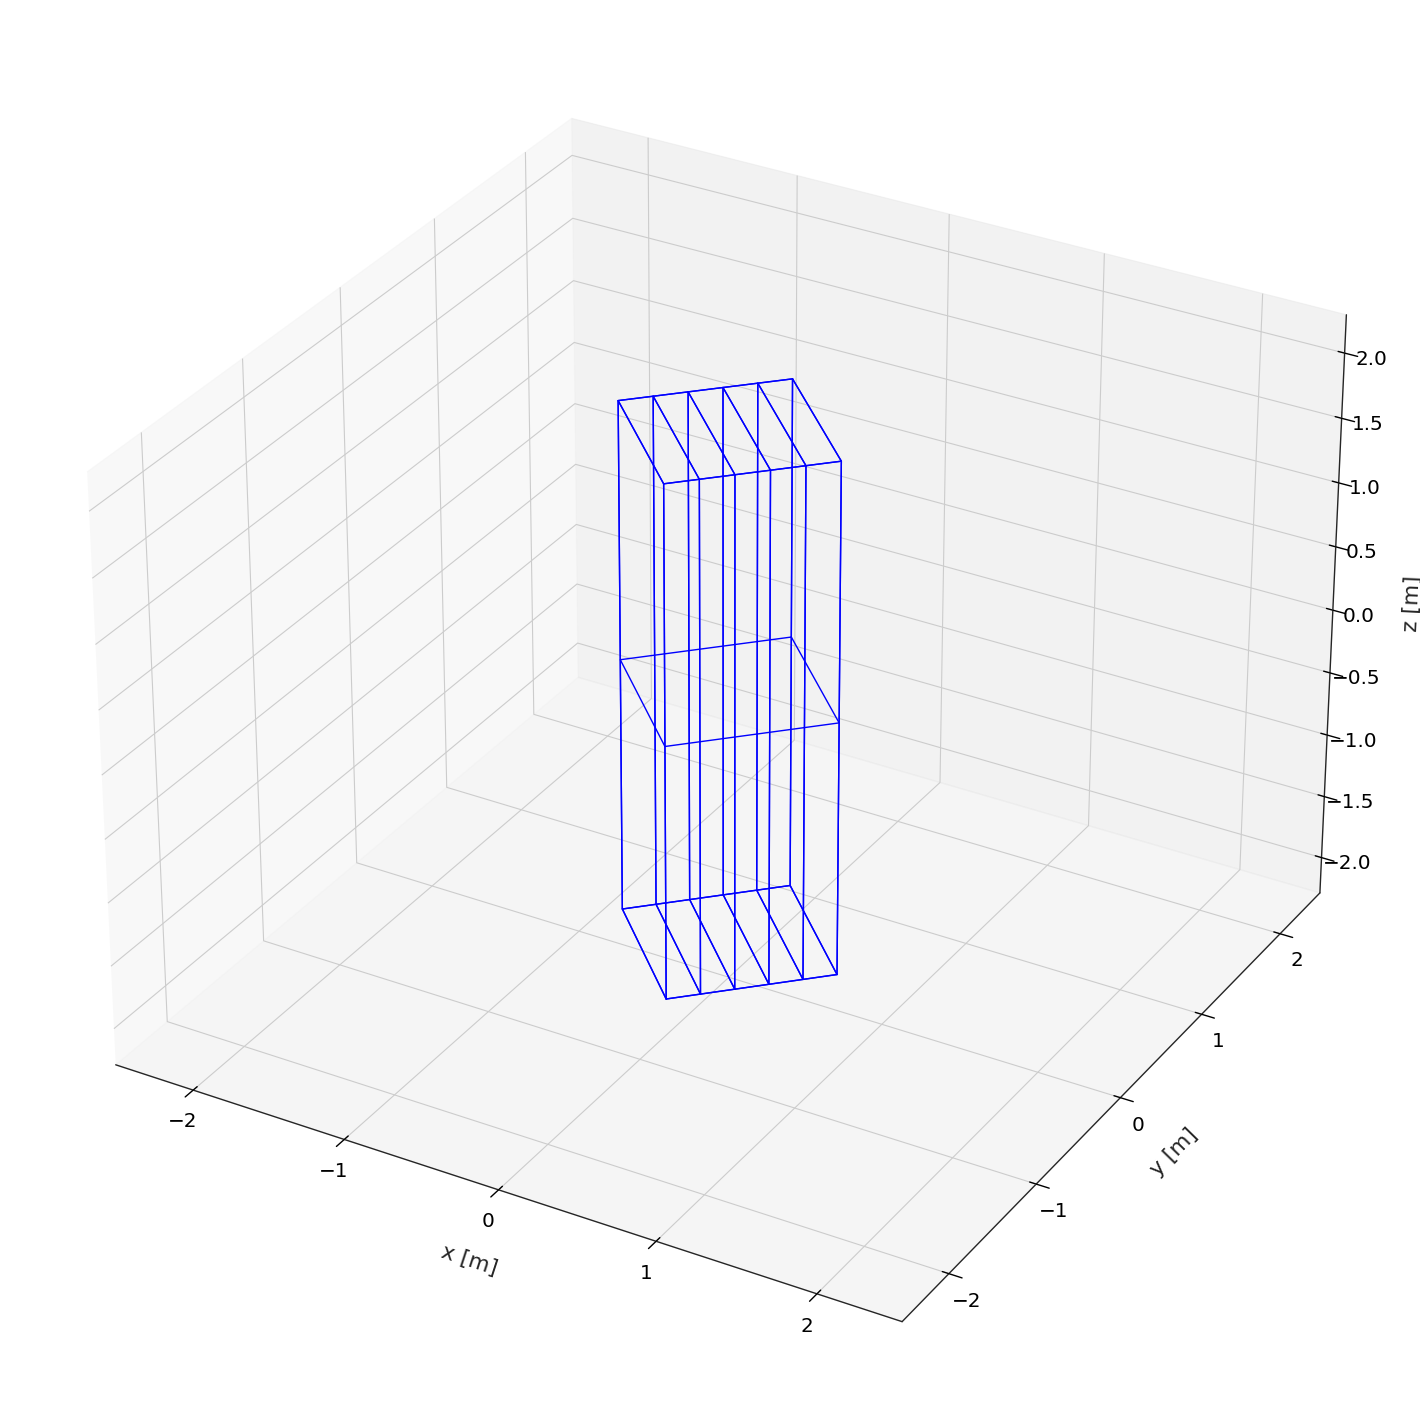

1.0000000000380493


In [3]:
ax = Plot3D()
source2.plot(ax=ax)
source2.sources.plot(ax=ax)
plt.show()
print(source2.seg_area)

The plot above shows that the segments have been correctly positioned and the correct number are present (5). Additionally the total area from the segments is correct to 10dp. Next tests will be done for the segments with various offsets starting with 45 deg. Initially will stick with only 5 segments so can see how at a low number it poorly maps the shape.

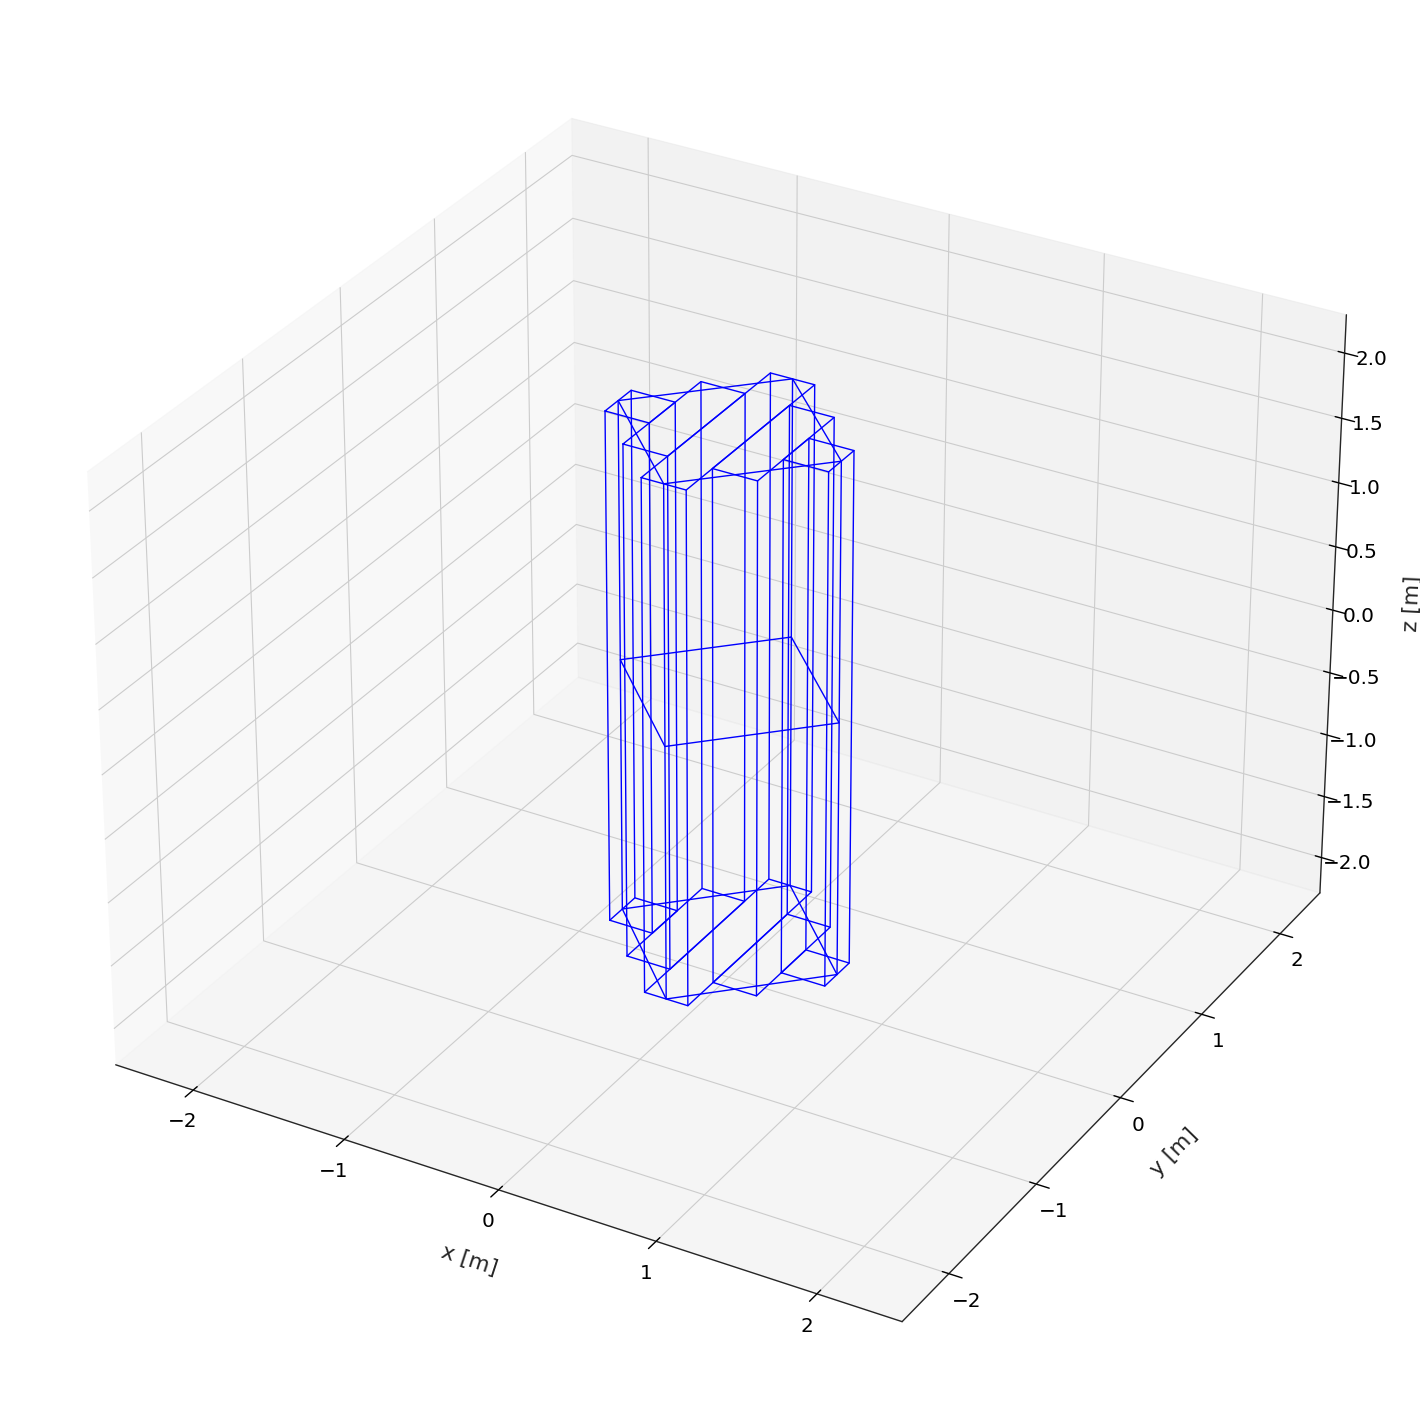

1.0400000000395715


In [4]:
source3 = PolyhedralPrismCurrentSource(
    np.array([0, 0, 0]),
    np.array([0, 4, 0]),
    np.array([0, 0, 1]),
    np.array([1, 0, 0]),
    np.array([1, 0, 0]),
    4,
    4,
    l,
    np.pi * 0 / 4,
    np.pi * 0 / 4,
    1e6,
    5
)
ax = Plot3D()
source3.plot(ax=ax)
source3.sources.plot(ax=ax)
plt.show()
print(source3.seg_area)

As can be seen there are gaps but overall it still mostly matches the prism with the segment area only showing a 4% deviation. If we change to show the result for a angle offset of 15 and 30 degrees the result is as follows. 

In [5]:
source4 = PolyhedralPrismCurrentSource(
    np.array([0, 0, 0]),
    np.array([0, 4, 0]),
    np.array([0, 0, 1]),
    np.array([1, 0, 0]),
    np.array([1.7, 1, 0]),
    4,
    4,
    l,
    np.pi * 0 / 4,
    np.pi * 0 / 4,
    1e6,
    5
)
source5 = PolyhedralPrismCurrentSource(
    np.array([0, 0, 0]),
    np.array([0, 4, 0]),
    np.array([0, 0, 1]),
    np.array([1, 0, 0]),
    np.array([2.7, 1, 0]),
    4,
    4,
    l,
    np.pi * 0 / 4,
    np.pi * 0 / 4,
    1e6,
    5
)
print("15 deg segment area =", source4.seg_area)
print("30 deg segment area =", source5.seg_area)

15 deg segment area = 1.000211640249696
30 deg segment area = 1.0336406995623812


From these two areas it becomes clear that the closer to a 0 deg offset the better the shape fits. If we now do this for 20 segments not 5 the result is...

In [6]:
source6 = PolyhedralPrismCurrentSource(
    np.array([0, 0, 0]),
    np.array([0, 4, 0]),
    np.array([0, 0, 1]),
    np.array([1, 0, 0]),
    np.array([1, 0, 0]),
    4,
    4,
    l,
    np.pi * 0 / 4,
    np.pi * 0 / 4,
    1e6,
    20
)
source7 = PolyhedralPrismCurrentSource(
    np.array([0, 0, 0]),
    np.array([0, 4, 0]),
    np.array([0, 0, 1]),
    np.array([1, 0, 0]),
    np.array([1.7, 1, 0]),
    4,
    4,
    l,
    np.pi * 0 / 4,
    np.pi * 0 / 4,
    1e6,
    20
)
source8 = PolyhedralPrismCurrentSource(
    np.array([0, 0, 0]),
    np.array([0, 4, 0]),
    np.array([0, 0, 1]),
    np.array([1, 0, 0]),
    np.array([2.7, 1, 0]),
    4,
    4,
    l,
    np.pi * 0 / 4,
    np.pi * 0 / 4,
    1e6,
    20
)

print("15 deg segment area =", source7.seg_area)
print("30 deg segment area =", source8.seg_area)
print("45 deg segment area =", source6.seg_area)

15 deg segment area = 1.000211640249696
30 deg segment area = 1.0010174881143992
45 deg segment area = 1.0000000000380493


These results counteract the previous results. This is likely because at a higher number of segments the 45 offset becomes very symmetric so the area closely models the actual area even if the shape doesn't. However for the other offsets there is less axes of symmetry so even if the shape is more closely followed the area is further from the actual value.

### Field Benchmark

The next part to test is how the magnetostatics compare.

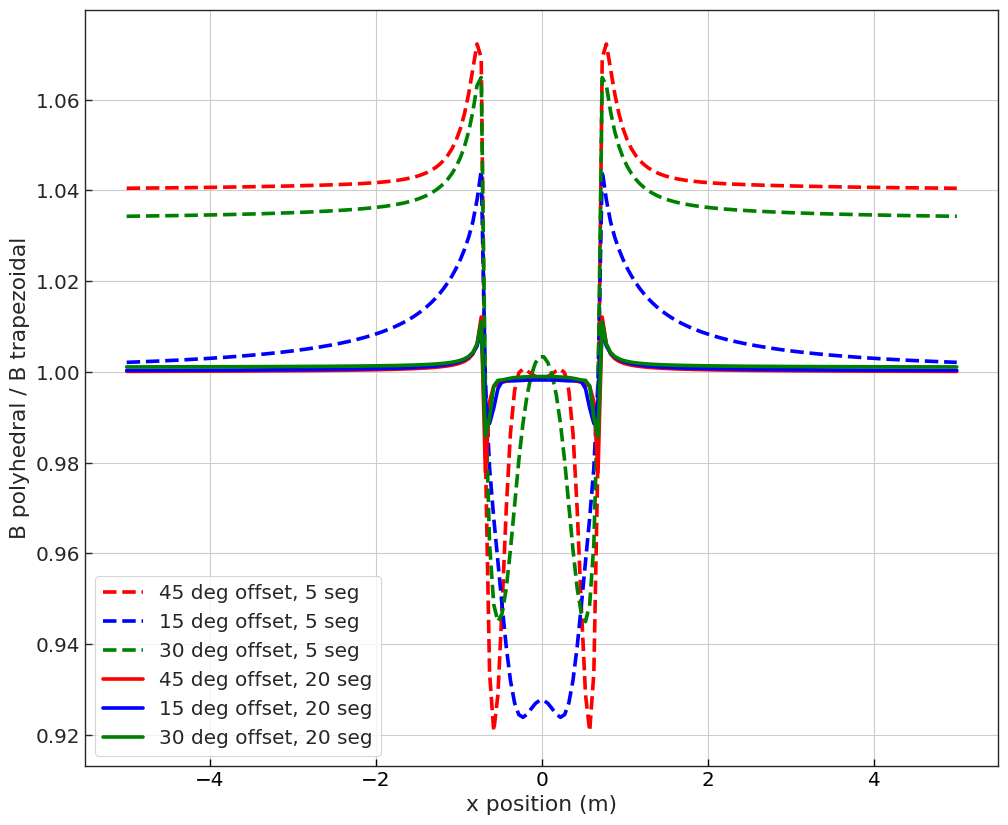

In [7]:
n = 200
x = np.linspace(-5, 5, n)
y = np.zeros(n)
z = np.zeros(n)
bx, by, bz = source.field(x,y,z)
B = np.sqrt(bx**2 + by**2 + bz**2)
bx2, by2, bz2 = source3.field(x,y,z)
B2 = np.sqrt(bx2**2 + by2**2 + bz2**2)
bx3, by3, bz3 = source4.field(x,y,z)
B3 = np.sqrt(bx3**2 + by3**2 + bz3**2)
bx4, by4, bz4 = source5.field(x,y,z)
B4 = np.sqrt(bx4**2 + by4**2 + bz4**2)
bx5, by5, bz5 = source6.field(x,y,z)
B5 = np.sqrt(bx5**2 + by5**2 + bz5**2)
bx6, by6, bz6 = source7.field(x,y,z)
B6 = np.sqrt(bx6**2 + by6**2 + bz6**2)
bx7, by7, bz7 = source8.field(x,y,z)
B7 = np.sqrt(bx7**2 + by7**2 + bz7**2)
fig = plt.figure()
plt.plot(x, B2/B, 'r--', label=f"45 deg offset, 5 seg")
plt.plot(x, B3/B, 'b--', label=f"15 deg offset, 5 seg")
plt.plot(x, B4/B, 'g--', label=f"30 deg offset, 5 seg")
plt.plot(x, B5/B, 'r-', label=f"45 deg offset, 20 seg")
plt.plot(x, B6/B, 'b-', label=f"15 deg offset, 20 seg")
plt.plot(x, B7/B, 'g-', label=f"30 deg offset, 20 seg")
plt.grid("True")
plt.ylabel("B polyhedral / B trapezoidal")
plt.xlabel("x position (m)")
plt.legend()
plt.show()

Here first thing that is clear is that more segments improves the accuracy of the magnetic field as expected. Additionally the greater the amount of offset the less accurate the model is. This shows that for magnetostatics matching the shape is more important than matching the area. For the higher number of segments it is hard to differentiate them due to the scale. On their own below...

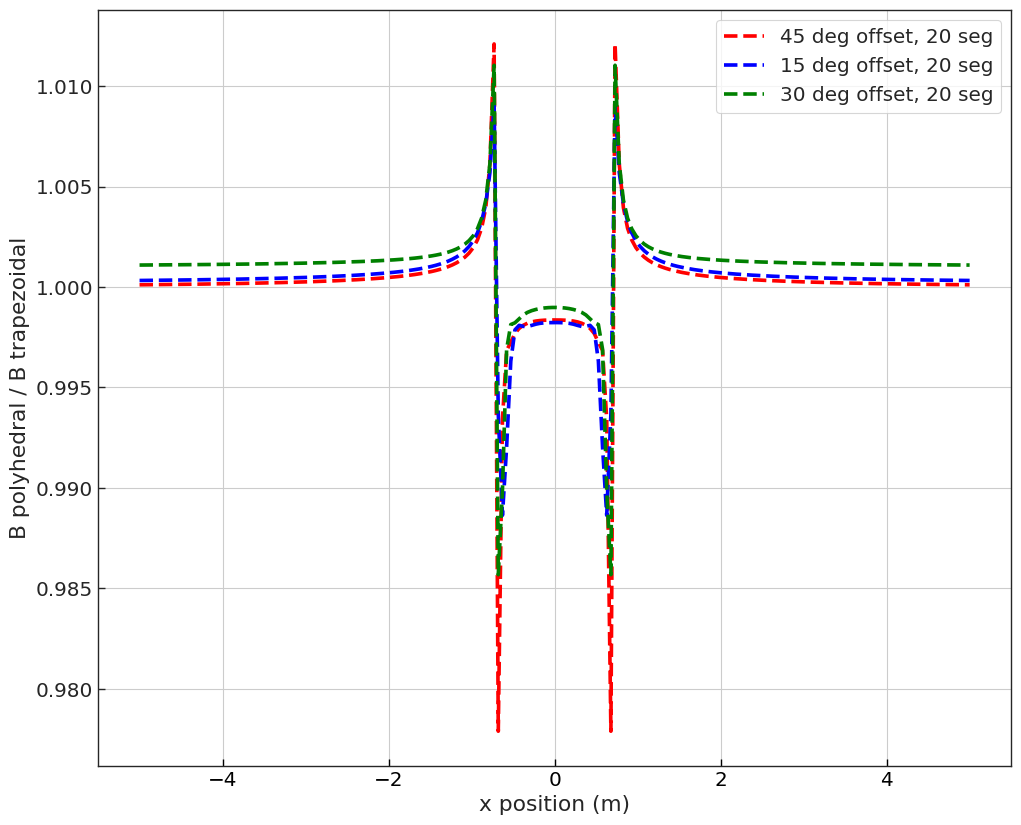

position = -2.0351758793969847
30 deg norm field = 1.0013253704903013
15 deg norm field = 1.0006925673155993
45 deg norm field = 1.0004606755437733


In [8]:
fig = plt.figure()
plt.plot(x, B5/B, 'r--', label=f"45 deg offset, 20 seg")
plt.plot(x, B6/B, 'b--', label=f"15 deg offset, 20 seg")
plt.plot(x, B7/B, 'g--', label=f"30 deg offset, 20 seg")
plt.grid("True")
plt.ylabel("B polyhedral / B trapezoidal")
plt.xlabel("x position (m)")
plt.legend()
plt.show()
p = 59
print("position =", x[p])
print("30 deg norm field =", B7[p]/B[p])
print("15 deg norm field =", B6[p]/B[p])
print("45 deg norm field =", B5[p]/B[p])

This reinforce the previous point that a lower offset is better for an accurate magnetostatics approximation at the surface of prism. However as distance from the prism increases the shape becomes less important and the segment area becomes the more important part. The reason for this is because the current is tied into the current density so a correct area represents a correct current so the larger the disparity the more incorrect the current is and so the more incorrect the magnetic field is. Either way with the field at 2m they are all nearly below 0.1% magnetic field deviation with the 45 offset being below 0.004% deviation. The 30 degree offset is the worst because it has the most inaccurate area.

Increasign the number of segments up to 100 on the 45 degree offset will be used to try and get the best possible model.

In [9]:
source9 = PolyhedralPrismCurrentSource(
    np.array([0, 0, 0]),
    np.array([0, 4, 0]),
    np.array([0, 0, 1]),
    np.array([1, 0, 0]),
    np.array([1, 0, 0]),
    4,
    4,
    l,
    np.pi * 0 / 4,
    np.pi * 0 / 4,
    1e6,
    100
)
print("45 deg with 100 segments area =", source9.seg_area)
bx8, by8, bz8 = source9.field(x,y,z)
B8 = np.sqrt(bx8**2 + by8**2 + bz8**2)
print("position =", x[p])
print("45 deg with 100 segments norm field =", B8[p]/B[p])

45 deg with 100 segments area = 1.0000000000380491
position = -2.0351758793969847
45 deg with 100 segments norm field = 1.0000184290105978


With a 45 degree offset and 100 segments the area becomes correct to 10dp and the field is correct to within 4dp. The field has become more accurate however the area is approximately the same. This shows the impact the shape has, smaller than area but still significant.

Further increasing the number of segments to 1000 gets the accuracy to 6sf which is more than sufficient for use and testing purposes.

In [10]:
source10 = PolyhedralPrismCurrentSource(
    np.array([0, 0, 0]),
    np.array([0, 4, 0]),
    np.array([0, 0, 1]),
    np.array([1, 0, 0]),
    np.array([1, 0, 0]),
    4,
    4,
    l,
    np.pi * 0 / 4,
    np.pi * 0 / 4,
    1e6,
    1000
)
bx9, by9, bz9 = source10.field(x,y,z)
B9 = np.sqrt(bx9**2 + by9**2 + bz9**2)
print("position =", x[p])
print("45 deg with 1000 segments norm field =", B9[p]/B[p])

position = -2.0351758793969847
45 deg with 1000 segments norm field = 1.00000018429129
